In [4]:
import pandas as pd

In [5]:
import numpy as np

In [45]:
df = pd.read_csv('/content/NSE-ONGC.csv')

In [46]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,142.05,146.20,142.05,146.05,145.70,7395898.0,10721.36
1,2019-01-03,145.00,145.65,141.60,142.00,142.40,26599483.0,38110.57
2,2019-01-02,148.00,148.35,145.75,146.85,147.05,17436694.0,25629.13
3,2019-01-01,150.00,150.10,148.00,148.25,148.50,4496586.0,6697.98
4,2018-12-31,150.15,150.80,149.10,149.80,149.90,5778308.0,8663.18
...,...,...,...,...,...,...,...,...
5177,1998-03-27,268.95,275.50,268.95,274.90,274.70,5900.0,16.12
5178,1998-03-26,290.00,290.00,268.75,272.00,272.65,18700.0,52.13
5179,1998-03-25,255.00,275.25,255.00,275.25,275.25,20400.0,54.75
5180,1998-03-24,247.95,256.50,241.90,250.25,250.20,15800.0,39.26


In [47]:
df.isna().any()


Date                    False
Open                    False
High                    False
Low                     False
Last                     True
Close                    True
Total Trade Quantity     True
Turnover (Lacs)          True
dtype: bool

In [48]:
df.drop([5181], axis = 0,  inplace=True)

In [49]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,142.05,146.20,142.05,146.05,145.70,7395898.0,10721.36
1,2019-01-03,145.00,145.65,141.60,142.00,142.40,26599483.0,38110.57
2,2019-01-02,148.00,148.35,145.75,146.85,147.05,17436694.0,25629.13
3,2019-01-01,150.00,150.10,148.00,148.25,148.50,4496586.0,6697.98
4,2018-12-31,150.15,150.80,149.10,149.80,149.90,5778308.0,8663.18
...,...,...,...,...,...,...,...,...
5176,1998-03-30,277.00,281.95,265.00,265.00,266.45,8400.0,22.87
5177,1998-03-27,268.95,275.50,268.95,274.90,274.70,5900.0,16.12
5178,1998-03-26,290.00,290.00,268.75,272.00,272.65,18700.0,52.13
5179,1998-03-25,255.00,275.25,255.00,275.25,275.25,20400.0,54.75


In [50]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999564,0.999380,0.999183,0.999216,-0.215056,0.329236
High,0.999564,1.000000,0.999211,0.999610,0.999637,-0.213159,0.334957
Low,0.999380,0.999211,1.000000,0.999533,0.999562,-0.216568,0.324423
Last,0.999183,0.999610,0.999533,1.000000,0.999972,-0.214801,0.329990
Close,0.999216,0.999637,0.999562,0.999972,1.000000,-0.214743,0.329936
Total Trade Quantity,-0.215056,-0.213159,-0.216568,-0.214801,-0.214743,1.000000,0.632273
Turnover (Lacs),0.329236,0.334957,0.324423,0.329990,0.329936,0.632273,1.000000


In [51]:
df.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [52]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [53]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import LSTM
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



In [54]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Open','Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Open'][i] = data['Open'][i]
    new_data['Close'][i] = data['Close'][i]

In [55]:
new_data

,Date,Open,Close
0,2019-01-04,142.05,145.7
1,2019-01-03,145,142.4
2,2019-01-02,148,147.05
3,2019-01-01,150,148.5
4,2018-12-31,150.15,149.9
...,...,...,...
5176,1998-03-30,277,266.45
5177,1998-03-27,268.95,274.7
5178,1998-03-26,290,272.65
5179,1998-03-25,255,275.25


In [56]:
Date = df["Date"]

In [57]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [58]:
new_data

,Open,Close
Date,,
2019-01-04,142.05,145.7
2019-01-03,145,142.4
2019-01-02,148,147.05
2019-01-01,150,148.5
2018-12-31,150.15,149.9
...,...,...
1998-03-30,277,266.45
1998-03-27,268.95,274.7
1998-03-26,290,272.65


In [59]:
train = new_data.iloc[:4181]

In [60]:
train

,Open,Close
Date,,
2019-01-04,142.05,145.7
2019-01-03,145,142.4
2019-01-02,148,147.05
2019-01-01,150,148.5
2018-12-31,150.15,149.9
...,...,...
2002-03-22,252,257.45
2002-03-21,250,249.75
2002-03-20,253.75,247.9


In [61]:
test = new_data.iloc[4181:]

In [62]:
test

,Open,Close
Date,,
2002-03-15,242,248.85
2002-03-14,240,240.7
2002-03-13,232,239.8
2002-03-12,242.8,235.55
2002-03-11,247.7,241.9
...,...,...
1998-03-30,277,266.45
1998-03-27,268.95,274.7
1998-03-26,290,272.65


In [63]:
X_train,Y_train = train.drop("Close",axis=1),train["Close"]

In [64]:
X_train

,Open
Date,
2019-01-04,142.05
2019-01-03,145
2019-01-02,148
2019-01-01,150
2018-12-31,150.15
...,...
2002-03-22,252
2002-03-21,250
2002-03-20,253.75


In [65]:
X_test,Y_test = test.drop("Close",axis=1),test["Close"]

In [66]:
X_test

,Open
Date,
2002-03-15,242
2002-03-14,240
2002-03-13,232
2002-03-12,242.8
2002-03-11,247.7
...,...
1998-03-30,277
1998-03-27,268.95
1998-03-26,290


In [67]:
Y_train = np.array(Y_train).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)

In [68]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [69]:
sc = MinMaxScaler(feature_range=(0,1))
Y_train = sc.fit_transform(Y_train)
Y_test  = sc.transform(Y_test)

In [70]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [71]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [106]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=60)

Epoch 1/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 2/50
70/70 [==============================] - 1s 7ms/step - loss: 0.0014
Epoch 3/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 4/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 5/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 6/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 7/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 8/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 9/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 10/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 11/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 12/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 13/50
70/70 [==============================

In [107]:
model.evaluate(X_test,Y_test)

32/32 [==============================] - 0s 3ms/step - loss: 4.8835e-05


4.8835190682439134e-05

In [108]:
from sklearn.metrics import r2_score

In [117]:
r2_score(Y_test,model.predict(X_test))

0.9561190367923987

In [118]:
Y = sc.inverse_transform(Y_test)

In [119]:
X = sc.inverse_transform(model.predict(X_test))

In [120]:
rms=np.sqrt(np.mean(np.power((Y - X),2)))

In [121]:
rms

9.41382508616143

In [118]:
import matplotlib.pyplot as plt

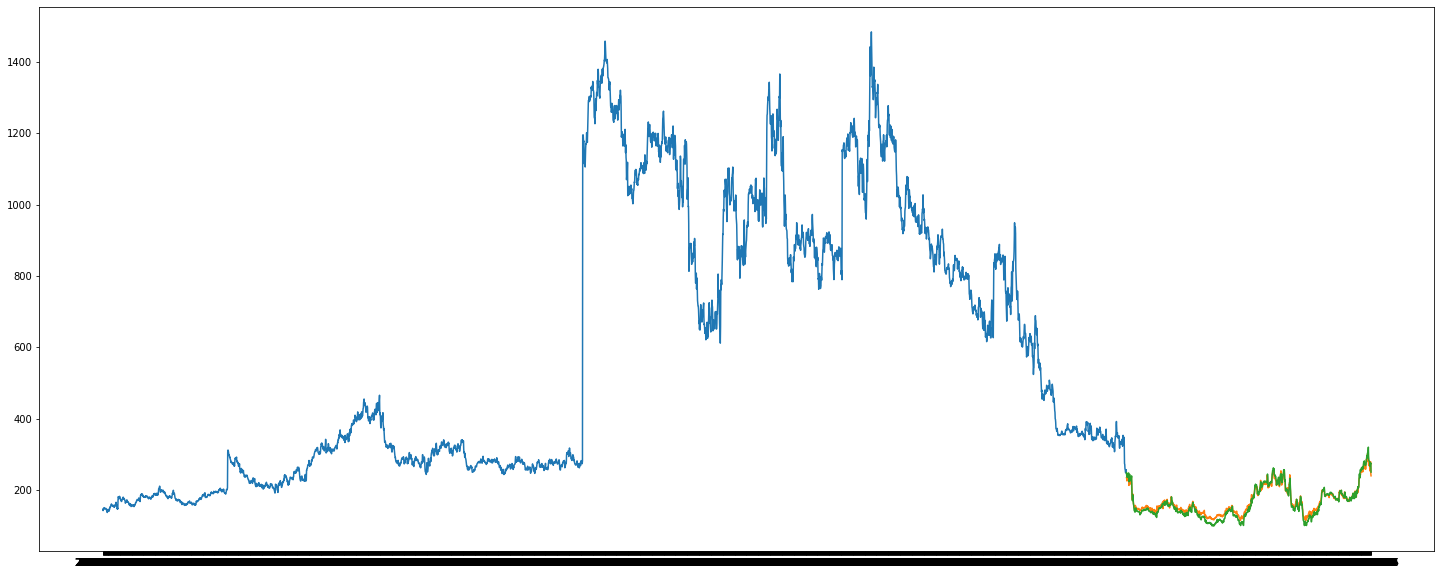

In [116]:
plt.figure(figsize=(25,10))
plt.plot(Date.iloc[:len(train)],train["Close"])
plt.plot(Date.iloc[len(train):], sc.inverse_transform(model.predict(X_test)))
plt.plot(Date.iloc[len(train):],sc.inverse_transform(Y_test))